In [1]:
%matplotlib inline
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt

import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

import pickle

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

import itertools

Using TensorFlow backend.


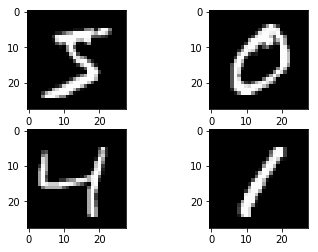

In [2]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [3]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

Now we can load the MNIST dataset using the Keras helper function.

In [4]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

The training dataset is structured as a 3-dimensional array of instance, image width and image height. For a multi-layer perceptron model we must reduce the images down into a vector of pixels. In this case the 28×28 sized images will be 784 pixel input values.
We can do this transform easily using the reshape() function on the NumPy array. We can also reduce our memory requirements by forcing the precision of the pixel values to be 32 bit, the default precision used by Keras anyway.

In [5]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

The pixel values are gray scale between 0 and 255. It is almost always a good idea to perform some scaling of input values when using neural network models. Because the scale is well known and well behaved, we can very quickly normalize the pixel values to the range 0 and 1 by dividing each value by the maximum of 255.

In [6]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

Finally, the output variable is an integer from 0 to 9. This is a multi-class classification problem. As such, it is good practice to use a one hot encoding of the class values, transforming the vector of class integers into a binary matrix.
We can easily do this using the built-in np_utils.to_categorical() helper function in Keras.

In [7]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

We are now ready to create our simple neural network model. We will define our model in a function. This is handy if you want to extend the example later and try and get a better score.

In [8]:
# define baseline model
def baseline_model():
 # create model
 model = Sequential()
 model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
 model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
 # Compile model
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model

The model is a simple neural network with one hidden layer with the same number of neurons as there are inputs (784). A rectifier activation function is used for the neurons in the hidden layer.
A softmax activation function is used on the output layer to turn the outputs into probability-like values and allow one class of the 10 to be selected as the model’s output prediction. Logarithmic loss is used as the loss function (called categorical_crossentropy in Keras) and the efficient ADAM gradient descent algorithm is used to learn the weights.
We can now fit and evaluate the model. The model is fit over 10 epochs with updates every 200 images. The test data is used as the validation dataset, allowing you to see the skill of the model as it trains. A verbose value of 2 is used to reduce the output to one line for each training epoch.
Finally, the test dataset is used to evaluate the model and a classification error rate is printed.

In [9]:
# build the model
model = baseline_model()
# Fit the model
h = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 5s - loss: 0.2803 - acc: 0.9206 - val_loss: 0.1417 - val_acc: 0.9569
Epoch 2/10
 - 5s - loss: 0.1119 - acc: 0.9678 - val_loss: 0.0916 - val_acc: 0.9713
Epoch 3/10
 - 5s - loss: 0.0716 - acc: 0.9798 - val_loss: 0.0779 - val_acc: 0.9771
Epoch 4/10
 - 5s - loss: 0.0504 - acc: 0.9860 - val_loss: 0.0730 - val_acc: 0.9772
Epoch 5/10
 - 5s - loss: 0.0373 - acc: 0.9894 - val_loss: 0.0678 - val_acc: 0.9788
Epoch 6/10
 - 5s - loss: 0.0271 - acc: 0.9926 - val_loss: 0.0617 - val_acc: 0.9803
Epoch 7/10
 - 5s - loss: 0.0206 - acc: 0.9949 - val_loss: 0.0597 - val_acc: 0.9812
Epoch 8/10
 - 5s - loss: 0.0139 - acc: 0.9971 - val_loss: 0.0629 - val_acc: 0.9797
Epoch 9/10
 - 5s - loss: 0.0110 - acc: 0.9978 - val_loss: 0.0579 - val_acc: 0.9818
Epoch 10/10
 - 5s - loss: 0.0080 - acc: 0.9985 - val_loss: 0.0570 - val_acc: 0.9815
Baseline Error: 1.85%


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


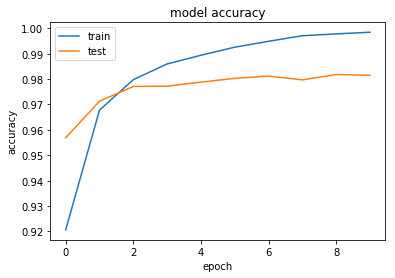

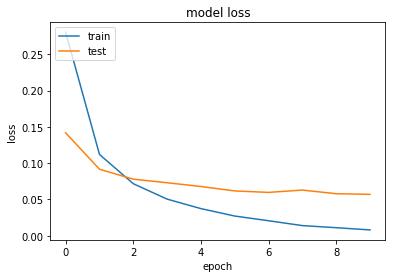

In [10]:
#
axes = plt.gca()

# set x label range
r = numpy.arange(0,10)

# list all data in history
print(h.history.keys())
# summarize history for accuracy
plt.plot(r, h.history['acc'])
plt.plot(r, h.history['val_acc'])
plt.title("model accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.xlim(32,224)
plt.show()

# summarize history for loss
plt.plot(r, h.history['loss'])
plt.plot(r, h.history['val_loss'])
plt.title("model loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.xlim(32,224)
plt.show()

In [11]:
# save the model
model.save("Mnist_Keras_tst.h5")
# save corresponding training history
with open("Mnist_Keras_history_tst.pkl","wb") as f:
 pickle.dump(h, f)

In [12]:
# Print out model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [13]:
#
preds = model.predict_classes(X_test)

In [14]:
# Funtion to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, numpy.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = numpy.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [15]:
#
test_labels = y_test
# https://stackoverflow.com/questions/48987959/classification-metrics-cant-handle-a-mix-of-continuous-multioutput-and-multi-la
test_labels = numpy.argmax(test_labels, axis=1)
cnf_matrix = confusion_matrix(test_labels, preds)

Confusion matrix, without normalization
[[ 969    1    0    1    1    1    2    1    4    0]
 [   0 1128    2    0    0    0    2    0    3    0]
 [   3    5  999    4    1    0    2    7   11    0]
 [   0    0    3  994    0    4    0    1    5    3]
 [   2    1    2    1  964    0    3    1    0    8]
 [   2    0    0    4    1  876    2    0    6    1]
 [   4    3    1    1    3    4  941    0    1    0]
 [   1    8    5    2    3    0    0 1001    4    4]
 [   0    0    0    3    3    2    0    2  961    3]
 [   1    2    0    5    9    3    1    2    4  982]]
Normalized confusion matrix
[[9.89e-01 1.02e-03 0.00e+00 1.02e-03 1.02e-03 1.02e-03 2.04e-03 1.02e-03
  4.08e-03 0.00e+00]
 [0.00e+00 9.94e-01 1.76e-03 0.00e+00 0.00e+00 0.00e+00 1.76e-03 0.00e+00
  2.64e-03 0.00e+00]
 [2.91e-03 4.84e-03 9.68e-01 3.88e-03 9.69e-04 0.00e+00 1.94e-03 6.78e-03
  1.07e-02 0.00e+00]
 [0.00e+00 0.00e+00 2.97e-03 9.84e-01 0.00e+00 3.96e-03 0.00e+00 9.90e-04
  4.95e-03 2.97e-03]
 [2.04e-03 1.02e-03 2

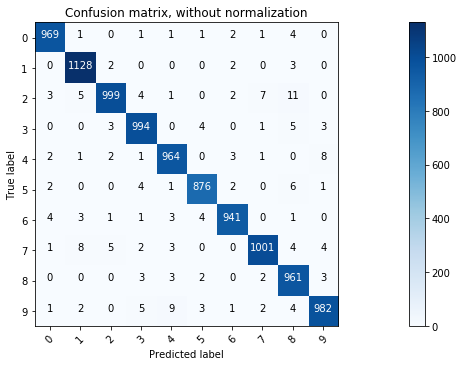

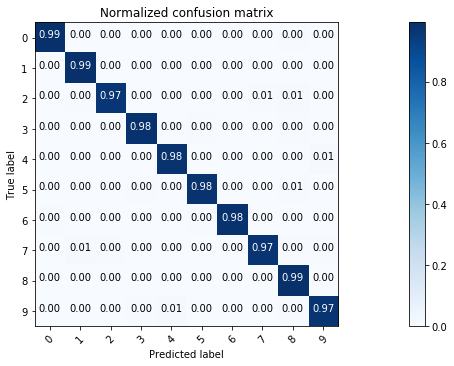

In [16]:
#
class_names = [i for i in range(10)]
numpy.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(20,5))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(20,5))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

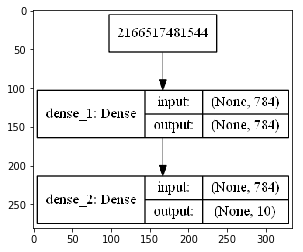

In [24]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='Mnist_Keras.png', show_shapes=True, show_layer_names=True)

import matplotlib.image as mpimg
img = mpimg.imread('Mnist_Keras.png')
plt.imshow(img)